# Template Notebook

## Setup

### Standard library imports

In [2]:
%load_ext autoreload

In [3]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

### Standard library imports

### Thrid Party libraries imports

In [4]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Modules imports

In [5]:
%autoreload 2

from source.operators.continuous import vectorized_crossover, vectorized_mutation
from source.operators.multiobjective import (
    assign_pareto_strength,
    collect_dominated_solutions,
    strength_binary_tournament_selection,
    strength_n_fittest_selection,
    strength_binary_tournament_selection
)
from source.spea_optimizer import SPEAOptimizer

### Paths

In [6]:
def test_function_4(x):  # soruce: https://www.researchgate.net/publication/2446107_A_Multiobjective_Evolutionary_Algorithm_The_Study_Cases
    x, y = x
    return [x**2 - y, -0.5*x - y - 1]

In [7]:
optimzier = SPEAOptimizer(test_function_4, 2, "min")

In [8]:
population = optimzier._init_population(100, initial_search_range=((-7, 4), (-7, 4)))

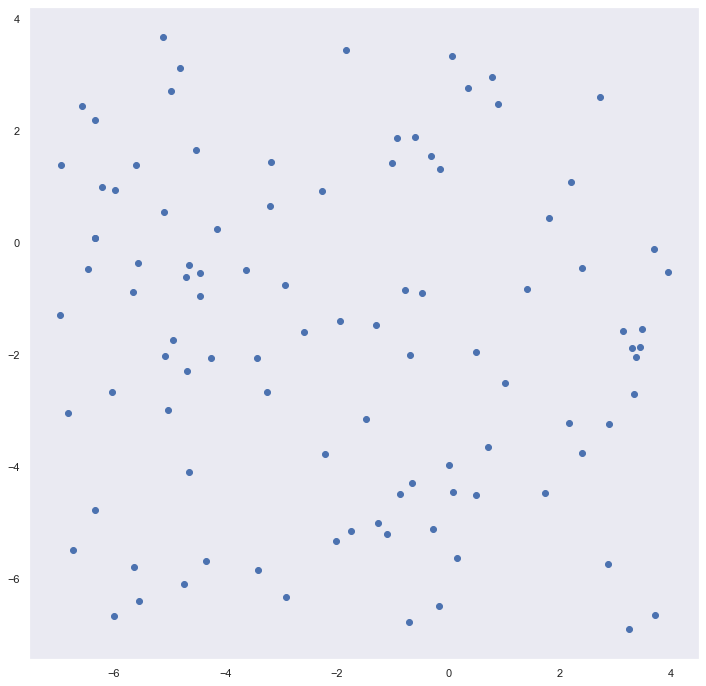

In [9]:
plt.figure(figsize=[12, 12])
sns.set()

plt.scatter(population[:, 0], population[:, 1], c="b")

plt.grid()

In [10]:
solutions = np.apply_along_axis(test_function_4, 1, population)
not_dominated_solutions = np.apply_along_axis(test_function_4, 1, optimzier._collect_all_non_dominated_individuals(population))

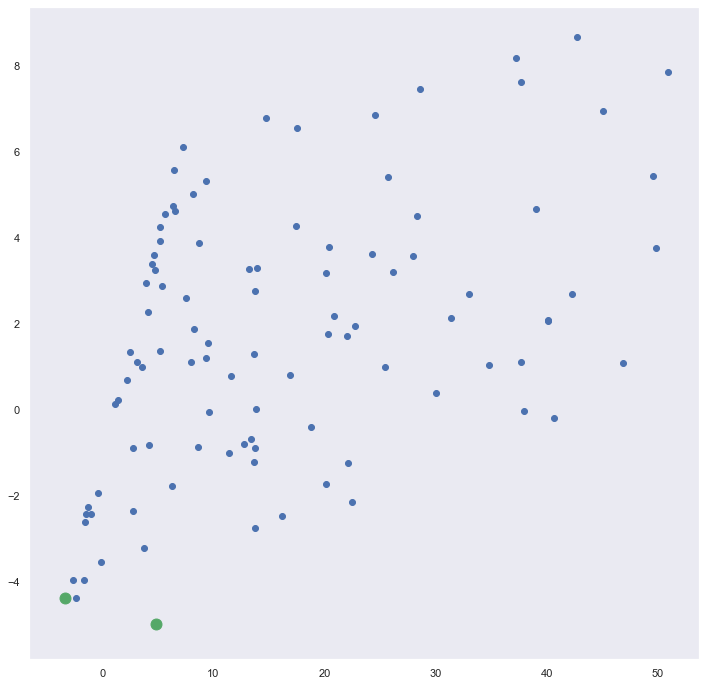

In [11]:
plt.figure(figsize=[12, 12])
sns.set()

plt.scatter(solutions[:, 0], solutions[:, 1], c="b")
plt.scatter(not_dominated_solutions[:, 0], not_dominated_solutions[:, 1], c="g", s=120)

plt.grid()

In [12]:
population.shape[0]

100

In [13]:
population[np.random.randint(0, population.shape[0], 2)]

array([[-2.58592544, -1.57662069],
       [-3.20627886,  0.658178  ]])

In [14]:
collect_dominated_solutions(population[0], population, mode="min")

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 34, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93,
       94, 95, 96, 97, 98, 99], dtype=int64)

In [15]:
assign_pareto_strength(population[7], population, mode="min")

90

In [16]:
population = optimzier._init_population(10, initial_search_range=((-10, -5), (5, 10)))

In [17]:
optimzier.mutate_population(population, 0.5, 1)

array([[ -8.83865141,   6.95695764],
       [ -8.85562391,   6.55455978],
       [ -5.83922404,   5.44078527],
       [ -5.64086816,   6.42244359],
       [ -8.73348581,   9.75310934],
       [ -9.43141337,   9.19762726],
       [ -7.8433271 ,   7.43472223],
       [ -9.05153788,   8.09701488],
       [-10.86764696,   6.96298214],
       [ -5.77109813,   7.12051944]])

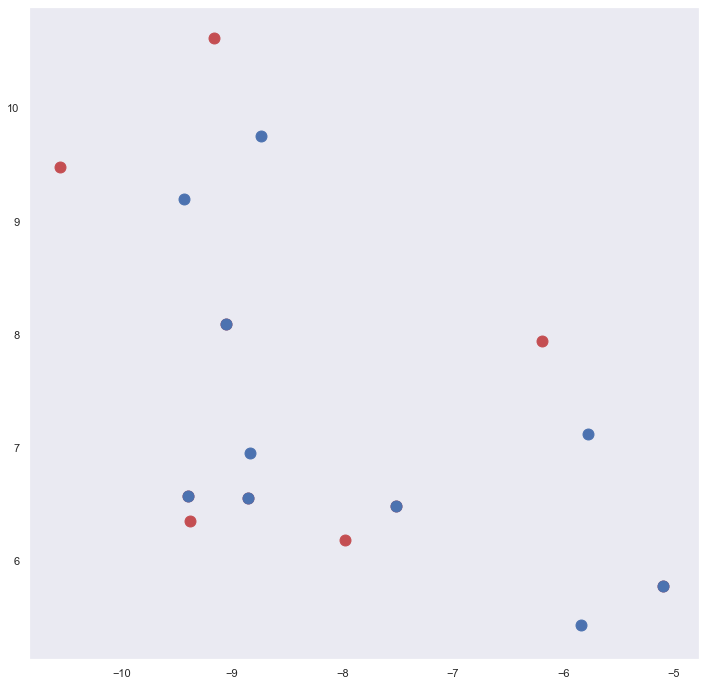

In [18]:
plt.figure(figsize=[12, 12])
sns.set()

mutated = optimzier.mutate_population(population, 0.5, 1)
plt.scatter(mutated[:, 0], mutated[:, 1], c="r", s=120)
plt.scatter(population[:, 0], population[:, 1], c="b", s=120)

plt.grid()

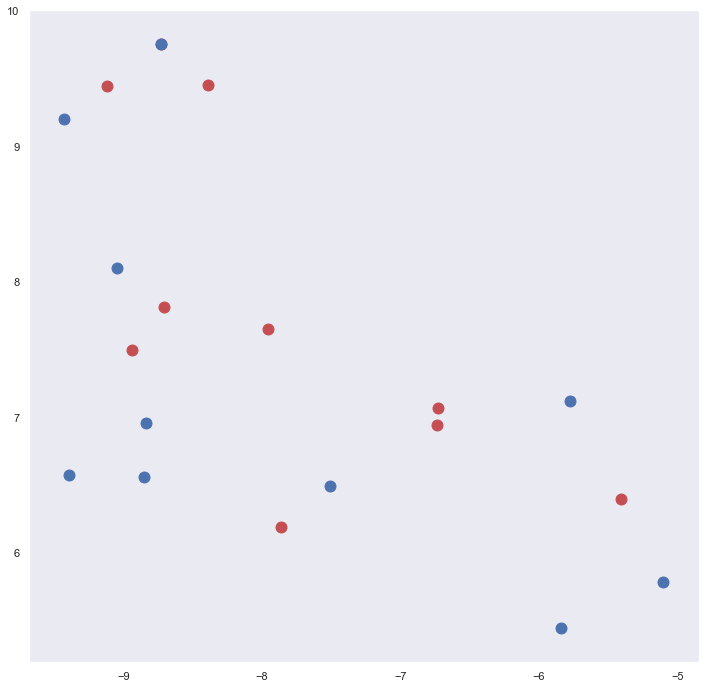

In [19]:
plt.figure(figsize=[12, 12])
sns.set()

offspring = optimzier.create_offspring(population, 8, 10)
plt.scatter(offspring[:, 0], offspring[:, 1], c="r", s=120)
plt.scatter(population[:, 0], population[:, 1], c="b", s=120)

plt.grid()